In [1]:
# # DO NOT REMOVE THESE
# %load_ext autoreload
# %autoreload 1
# %aimport src.base

In [3]:
# # DO NOT REMOVE This
# %reload_ext autoreload

In [4]:
# ## DO NOT REMOVE
# ## import local src module -
# ## src in this project will contain all your local code
# ## clean_data.py, model.py, visualize.py, custom.py

# #import src.base with alias to avoid namespace clashes

# from src import base as fis

In [5]:
# fis.test_base()

In [3]:
import pandas as pd
import numpy as np
import sqlite3

In [4]:
conn=sqlite3.connect("/Users/buddy4732/datascience/World_Health_Organization_Mental_Health_Resource_Study/who_suicide.db")
c=conn.cursor()

### Facilities

In [5]:
# conn=sqlite3.connect("/Users/buddy4732/datascience/World_Health_Organization_Mental_Health_Resource_Study/data/facilities.db")
# c=conn.cursor()

In [6]:
df_facilities=pd.read_sql_query("""
SELECT * FROM facilities

;""", con=conn)
df_facilities.head()

,Country,Year,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population)
0,Afghanistan,2016,0.003,0.012,0.006,,
1,Albania,2016,0.068,0.068,0.410,,0.445
2,Algeria,2016,0.048,0.068,0.048,,
3,Angola,2016,0.011,,,,0.014
4,Antigua and Barbuda,2016,1.001,,,,


In [7]:
df_facilities["Mental hospitals (per 100 000 population)"]=pd.to_numeric(df_facilities["Mental hospitals (per 100 000 population)"])
df_facilities["Mental health units in general hospitals (per 100 000 population)"]=pd.to_numeric(df_facilities["Mental health units in general hospitals (per 100 000 population)"])
df_facilities["Mental health outpatient facilities (per 100 000 population)"]=pd.to_numeric(df_facilities["Mental health outpatient facilities (per 100 000 population)"])
df_facilities["Mental health day treatment facilities (per 100 000 population)"]=pd.to_numeric(df_facilities["Mental health day treatment facilities (per 100 000 population)"])
df_facilities["Community residential facilities (per 100 000 population)"]=pd.to_numeric(df_facilities["Community residential facilities (per 100 000 population)"])

In [8]:
df_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
Country                                                              163 non-null object
Year                                                                 163 non-null object
Mental hospitals (per 100 000 population)                            131 non-null float64
Mental health units in general hospitals (per 100 000 population)    138 non-null float64
Mental health outpatient facilities (per 100 000 population)         139 non-null float64
Mental health day treatment facilities (per 100 000 population)      74 non-null float64
Community residential facilities (per 100 000 population)            65 non-null float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


In [9]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('suicide_rate',), ('facilities',), ('human_resources',)]


### Suicide Rate

In [10]:
# conn=sqlite3.connect("/Users/buddy4732/datascience/World_Health_Organization_Mental_Health_Resource_Study/data/suicide_rate.db")
# c=conn.cursor()
df_suicide_rate=pd.read_sql_query("""
SELECT * FROM suicide_rate

;""", con=conn)
df_suicide_rate.head()

,Country,Sex,15-29 years,30-49 years
0,Afghanistan,Both sexes,8.4,8.2
1,Afghanistan,Male,13.3,13.3
2,Afghanistan,Female,3,2.5
3,Albania,Both sexes,6.9,7.5
4,Albania,Male,5.8,11.1


In [11]:
df_suicide_rate["15-29  years"]=pd.to_numeric(df_suicide_rate["15-29  years"])

In [12]:
df_suicide_rate_male=pd.read_sql_query("""
SELECT * FROM suicide_rate WHERE Sex=="Male"
;""", con=conn)
df_suicide_rate_male.head()


,Country,Sex,15-29 years,30-49 years
0,Afghanistan,Male,13.3,13.3
1,Albania,Male,5.8,11.1
2,Algeria,Male,5.2,7.5
3,Angola,Male,9,9.3
4,Antigua and Barbuda,Male,0,0


In [13]:
df_suicide_rate_female=pd.read_sql_query("""
SELECT * FROM suicide_rate WHERE Sex=="Female"
;""", con=conn)
df_suicide_rate_female.head()

,Country,Sex,15-29 years,30-49 years
0,Afghanistan,Female,3,2.5
1,Albania,Female,8.1,4.2
2,Algeria,Female,2,2.5
3,Angola,Female,2.8,2.9
4,Antigua and Barbuda,Female,0,0


In [14]:
df_suicide_rate_btsx=pd.read_sql_query("""
SELECT * FROM suicide_rate WHERE Sex=="Both sexes"
;""", con=conn)

In [15]:
df_suicide_rate_btsx["15-29  years"]=pd.to_numeric(df_suicide_rate_btsx["15-29  years"])

### Human Resources

In [16]:

df_human_resources=pd.read_sql_query("""
SELECT * FROM human_resources

;""", con=conn)
df_human_resources.head()

,Country,Year,Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population)
0,Afghanistan,2016,0.231,0.098,,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,
4,Argentina,2016,21.705,,,222.572


In [17]:
df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"]=pd.to_numeric(df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"])

df_human_resources["Nurses working in mental health sector (per 100 000 population)"]=pd.to_numeric(df_human_resources["Nurses working in mental health sector (per 100 000 population)"])

df_human_resources["Social workers working in mental health sector (per 100 000 population)"]=pd.to_numeric(df_human_resources["Social workers working in mental health sector (per 100 000 population)"])

df_human_resources["Psychologists working in mental health sector (per 100 000 population)"]=pd.to_numeric(df_human_resources["Psychologists working in mental health sector (per 100 000 population)"])


In [18]:
df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"].fillna(value=df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"].mean(), inplace=True)

In [19]:
df_human_resources["Nurses working in mental health sector (per 100 000 population)"].fillna(value=df_human_resources["Nurses working in mental health sector (per 100 000 population)"].mean(), inplace=True)

In [20]:
df_human_resources["Social workers working in mental health sector (per 100 000 population)"].fillna(value=df_human_resources["Social workers working in mental health sector (per 100 000 population)"].mean(), inplace=True)

In [21]:
df_human_resources["Psychologists working in mental health sector (per 100 000 population)"].fillna(value=df_human_resources["Psychologists working in mental health sector (per 100 000 population)"].mean(), inplace=True)

In [22]:
df_human_resources.head(10)

,Country,Year,Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population)
0,Afghanistan,2016,0.231,0.098000,5.18063,0.296000
1,Albania,2016,1.471,6.876000,1.06000,1.231000
2,Angola,2016,0.057,0.660000,0.02200,0.179000
3,Antigua and Barbuda,2016,1.001,7.005000,4.00300,12.454208
4,Argentina,2016,21.705,15.356244,5.18063,222.572000
5,Armenia,2016,3.840,11.245000,0.27400,0.788000
6,Australia,2015,13.525,90.582000,5.18063,103.036000
7,Azerbaijan,2016,3.452,6.717000,0.11400,1.165000
8,Bahrain,2017,5.467,27.918000,1.45800,1.239000
9,Bangladesh,2016,0.130,0.873000,5.18063,0.124000


In [23]:
df_human_resources["Resource Sum"]=df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"] + df_human_resources["Nurses working in mental health sector (per 100 000 population)"] + df_human_resources["Social workers working in mental health sector (per 100 000 population)"] + df_human_resources["Psychologists working in mental health sector (per 100 000 population)"]

In [24]:
df_human_resources.head()

,Country,Year,Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population),Resource Sum
0,Afghanistan,2016,0.231,0.098000,5.18063,0.296000,5.805630
1,Albania,2016,1.471,6.876000,1.06000,1.231000,10.638000
2,Angola,2016,0.057,0.660000,0.02200,0.179000,0.918000
3,Antigua and Barbuda,2016,1.001,7.005000,4.00300,12.454208,24.463208
4,Argentina,2016,21.705,15.356244,5.18063,222.572000,264.813874


In [25]:
df_human_resources["Resource Sum"].mean()

38.12604133193111

In [26]:
df_above_mean=df_human_resources.loc[df_human_resources["Resource Sum"]>38.126]

In [27]:
above_mean_listo=list(df_above_mean["Country"])
df_suicides_above_mean_countries=df_suicide_rate_btsx.loc[df_suicide_rate_btsx["Country"].isin(above_mean_listo)]

In [28]:
above_mean_listo

['Argentina',
 'Australia',
 'Barbados',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Guatemala',
 'Hungary',
 'Israel',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Slovenia',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United States of America',
 'Uruguay']

In [29]:
df_suicide_rate_btsx.loc[df_suicide_rate_btsx["Country"].isin(above_mean_listo)]

,Country,Sex,15-29 years,30-49 years
5,Argentina,Both sexes,15.3,10.3
7,Australia,Both sexes,12.7,18
13,Barbados,Both sexes,0.0,0.4
14,Belarus,Both sexes,16.2,35
15,Belgium,Both sexes,11.2,23.8
22,Brazil,Both sexes,6.1,8.3
30,Canada,Both sexes,10.8,14.8
38,Costa Rica,Both sexes,9.6,10.2
40,Croatia,Both sexes,8.1,14.5
41,Cuba,Both sexes,5.7,12.1


In [30]:
df_below_mean=df_human_resources.loc[df_human_resources["Resource Sum"]<38.126]
df_below_mean.head()

,Country,Year,Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population),Resource Sum
0,Afghanistan,2016,0.231,0.098,5.18063,0.296000,5.805630
1,Albania,2016,1.471,6.876,1.06000,1.231000,10.638000
2,Angola,2016,0.057,0.660,0.02200,0.179000,0.918000
3,Antigua and Barbuda,2016,1.001,7.005,4.00300,12.454208,24.463208
5,Armenia,2016,3.840,11.245,0.27400,0.788000,16.147000


In [31]:
below_mean_listo=list(df_below_mean["Country"])

In [32]:
df_suicides_below_mean_countries=df_suicide_rate_btsx.loc[df_suicide_rate_btsx["Country"].isin(below_mean_listo)]

### Alternative Hypothesis 1:

There is a difference in suicide rates for countries below and above the mean threshold of mental health providers per 100,000 people ages 15-29	

Note: mental health providers include psychiatrists, psychologists, dedicated mental health nurses, social workers

### T TEST: 2 independent samples

In [33]:
from scipy.stats import ttest_ind
ttest_ind(df_suicides_below_mean_countries["15-29  years"], df_suicides_above_mean_countries["15-29  years"], equal_var=False)

Ttest_indResult(statistic=-2.1885696478687415, pvalue=0.03175338167560461)

In [34]:
#make clear that support across providers equal weight

## Alternative Hypothesis 2

There is a difference in suicide rates for countries below  and above the mean threshold of psychiatrists per 100,000 people ages 15-29

In [35]:
df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"].mean()

5.134958904109591

In [36]:
df_human_resources_psychiatrists_above=df_human_resources.loc[df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"]>5.135]


In [37]:
df_human_resources_psychiatrists_below=df_human_resources.loc[df_human_resources["Psychiatrists working in mental health sector (per 100 000 population)"]<5.135]


In [38]:
below_mean_psychiatrists=list(df_human_resources_psychiatrists_below["Country"])

In [39]:
above_mean_psychiatrists=list(df_human_resources_psychiatrists_above["Country"])

In [40]:
df_psychiatrists_above_mean_countries=df_suicide_rate_btsx.loc[df_suicide_rate_btsx["Country"].isin(above_mean_psychiatrists)]

In [41]:
df_psychiatrists_below_mean_countries=df_suicide_rate_btsx.loc[df_suicide_rate_btsx["Country"].isin(below_mean_psychiatrists)]

In [42]:
from scipy.stats import ttest_ind
ttest_ind(df_psychiatrists_below_mean_countries["15-29  years"], df_psychiatrists_above_mean_countries["15-29  years"], equal_var=False)

Ttest_indResult(statistic=-1.8711726016351151, pvalue=0.06485399036052825)

### Alternative Hypothesis 3

There is a difference in suicide rates for males in countries below and above the mean threshold of mental health professionals per 100,000 people ages 15-29

In [50]:
df_suicide_rate_male["15-29  years"]=pd.to_numeric(df_suicide_rate_male["15-29  years"])

In [53]:
df_suicide_rate_male_above=df_suicide_rate_male.loc[df_suicide_rate_male["Country"].isin(above_mean_listo)]
df_suicide_rate_male_below=df_suicide_rate_male.loc[df_suicide_rate_male["Country"].isin(below_mean_listo)]


### BOOTSTRAP

In [54]:

def bootstrap(sample, n):
    return np.random.choice(sample, n, replace=True)

In [55]:
np.random.seed(1)
bootstrap_above=bootstrap(df_suicide_rate_male_above["15-29  years"],5000)

In [56]:
np.random.seed(1)
bootsrap_below=bootstrap(df_suicide_rate_male_below["15-29  years"],5000)

In [57]:
bootsrap_below

array([ 6. ,  8.3,  5.7, ...,  5. , 17.3,  5.5])

In [58]:
ttest_ind(df_suicide_rate_male_below["15-29  years"], df_suicide_rate_male_above["15-29  years"], equal_var=False)

Ttest_indResult(statistic=-2.967964632503082, pvalue=0.004221055175248719)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

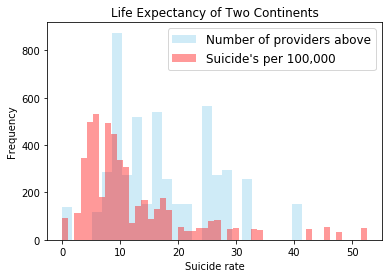

In [60]:
sns.distplot(bootstrap_above, kde=False, color="skyblue", label="Number of providers above")
sns.distplot(bootsrap_below, kde=False, color="red", label="Suicide's per 100,000")
plt.legend(prop={'size': 12})
plt.title('Life Expectancy of Two Continents')
plt.xlabel('Suicide rate')
plt.ylabel('Frequency')


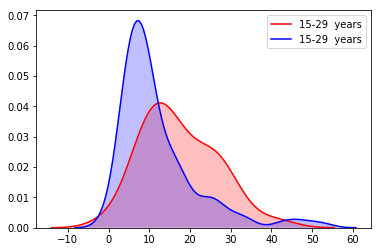

In [61]:
p1=sns.kdeplot(df_suicide_rate_male_above["15-29  years"], vertical=False, shade=True, color="r")
p1=sns.kdeplot(df_suicide_rate_male_below["15-29  years"], vertical=False, shade=True, color="b")


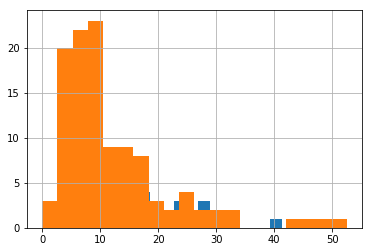

In [62]:
df_suicide_rate_male_above["15-29  years"].hist(bins=20)
df_suicide_rate_male_below["15-29  years"].hist(bins=20)

### Alternative Hypothesis 4

There is a difference in suicide rates for males in countries below and above the mean threshold of mental health professionals per 100,000 people ages 15-29

In [63]:
df_suicide_rate_female["15-29  years"]=pd.to_numeric(df_suicide_rate_female["15-29  years"])

In [64]:
df_suicide_rate_female.head()

,Country,Sex,15-29 years,30-49 years
0,Afghanistan,Female,3.0,2.5
1,Albania,Female,8.1,4.2
2,Algeria,Female,2.0,2.5
3,Angola,Female,2.8,2.9
4,Antigua and Barbuda,Female,0.0,0


In [65]:
df_suicide_rate_female_above=df_suicide_rate_female.loc[df_suicide_rate_female["Country"].isin(above_mean_listo)]
df_suicide_rate_female_below=df_suicide_rate_female.loc[df_suicide_rate_female["Country"].isin(below_mean_listo)]


In [66]:
ttest_ind(df_suicide_rate_female_below["15-29  years"], df_suicide_rate_female_above["15-29  years"], equal_var=False)

Ttest_indResult(statistic=1.1460838098127855, pvalue=0.25390314603668473)